# Análise de Vendas

## 1. Importação dos dados
Os dados foram importados a partir de um arquivo CSV contendo informações sobre vendas, como data, produto, categoria, quantidade, preço unitário e custo unitário.


In [63]:
import pandas as pd
df = pd.read_csv("vendas.csv")
df.head()

,data,produto,categoria,quantidade,preco_unitario,custo_unitario
0,2024-01-05,Notebook,Eletrônicos,2,3500,2800
1,2024-01-07,Mouse,Eletrônicos,5,120,60
2,2024-01-10,Cadeira,Escritório,1,900,600
3,2024-01-15,Teclado,Eletrônicos,3,200,120
4,2024-01-18,Monitor,Eletrônicos,2,1200,850


## 2. Exploração inicial

Nesta etapa foi realizada uma análise inicial do conjunto de dados para verificar:
- Estrutura das colunas
- Tipos de dados
- Presença de valores nulos


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            8 non-null      object
 1   produto         8 non-null      object
 2   categoria       8 non-null      object
 3   quantidade      8 non-null      int64 
 4   preco_unitario  8 non-null      int64 
 5   custo_unitario  8 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 516.0+ bytes


## 3. Criação de métricas

Nesta etapa foi criada a métrica de faturamento, calculada a partir da multiplicação da quantidade vendida pelo preço unitário de cada produto.


In [65]:
df["faturamento"] = df["quantidade"] * df ["preco_unitario"]
df.head()

,data,produto,categoria,quantidade,preco_unitario,custo_unitario,faturamento
0,2024-01-05,Notebook,Eletrônicos,2,3500,2800,7000
1,2024-01-07,Mouse,Eletrônicos,5,120,60,600
2,2024-01-10,Cadeira,Escritório,1,900,600,900
3,2024-01-15,Teclado,Eletrônicos,3,200,120,600
4,2024-01-18,Monitor,Eletrônicos,2,1200,850,2400


## 4. Análises

### 4.1 Faturamento total

Nesta análise foi calculado o faturamento total obtido a partir da soma de todas as vendas registradas no período.


In [66]:
df["faturamento"].sum()

np.int64(14500)

### 4.2 Faturamento por categoria

Nesta análise foi calculado o faturamento total agrupado por categoria de produto, permitindo identificar quais categorias geraram maior receita.


In [67]:
df.groupby("categoria") ["faturamento"].sum()

,faturamento
categoria,
Acessórios,300
Eletrônicos,11800
Escritório,2400


In [68]:
# 4.3 Custo total
df["custo_total"] = df["quantidade"] * df["custo_unitario"]
df["custo_total"].sum()


np.int64(10400)

In [69]:
# 4.X Lucro (criando a coluna)
df["lucro"] = df["faturamento"] - df["custo_total"]
df["lucro"].sum()


np.int64(4100)

In [70]:
lucro_categoria = df.groupby("categoria")["lucro"].sum()
lucro_categoria


,lucro
categoria,
Acessórios,180
Eletrônicos,3120
Escritório,800


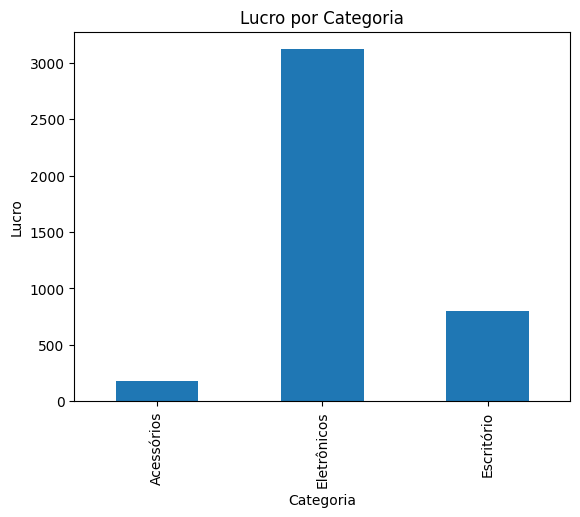

In [71]:
import matplotlib.pyplot as plt

lucro_categoria.plot(kind="bar")
plt.title("Lucro por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Lucro")
plt.show()


In [72]:
lucro_produto = df.groupby("produto")["lucro"].sum()
lucro_produto


,lucro
produto,
Cadeira,300
Headset,480
Mesa,500
Monitor,700
Mouse,300
Mousepad,180
Notebook,1400
Teclado,240


In [73]:
lucro_produto_ordenado = lucro_produto.sort_values(ascending=False)
lucro_produto_ordenado


,lucro
produto,
Notebook,1400
Monitor,700
Mesa,500
Headset,480
Cadeira,300
Mouse,300
Teclado,240
Mousepad,180


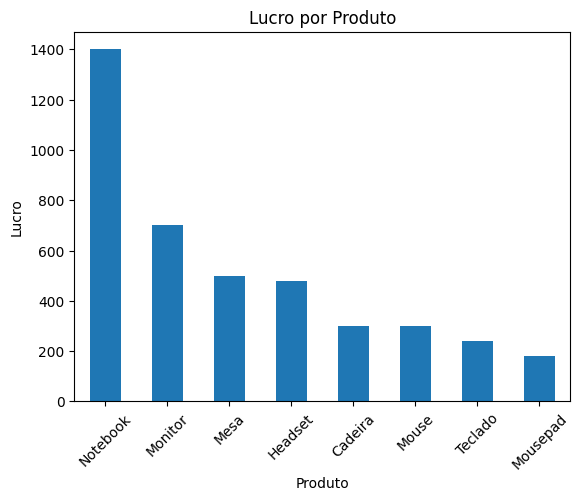

In [74]:
import matplotlib.pyplot as plt

lucro_produto_ordenado.plot(kind="bar")
plt.title("Lucro por Produto")
plt.xlabel("Produto")
plt.ylabel("Lucro")
plt.xticks(rotation=45)
plt.show()


Interpretação do gráfico de lucro por produto

O gráfico de lucro por produto evidencia que o Notebook é o produto com maior lucro no período analisado, destacando-se de forma significativa em relação aos demais.

O Monitor aparece como o segundo produto mais lucrativo, enquanto itens como Mousepad, Teclado e Cadeira apresentam menor contribuição para o lucro total.

Esses resultados indicam que produtos de maior valor agregado geram maior impacto no resultado financeiro da empresa.

4.X Lucro total

Nesta análise foi calculado o lucro total do período, obtido a partir da diferença entre o faturamento total e o custo total.


In [75]:
df["lucro"].sum()


np.int64(4100)

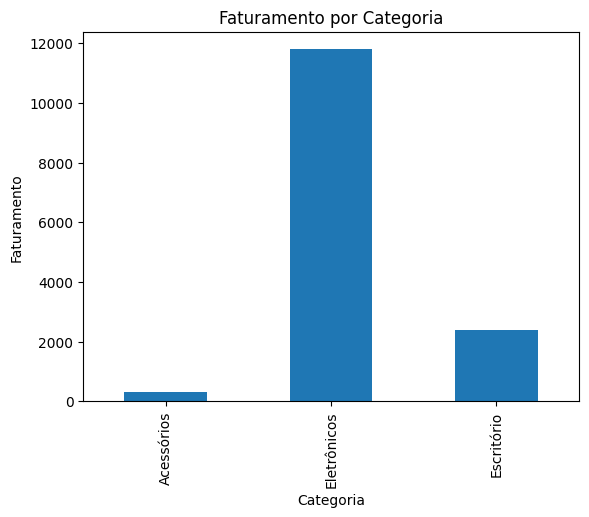

In [76]:
import matplotlib.pyplot as plt

faturamento_categoria = df.groupby("categoria")["faturamento"].sum()

faturamento_categoria.plot(kind="bar")
plt.title("Faturamento por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Faturamento")
plt.show()


**Interpretação do gráfico**

O gráfico apresenta o faturamento total por categoria de produto.
Observa-se que a categoria **Eletrônicos** possui o maior faturamento no período analisado,
enquanto **Acessórios** apresenta o menor valor.


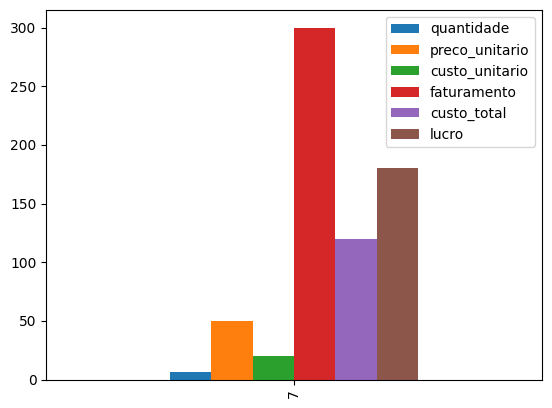

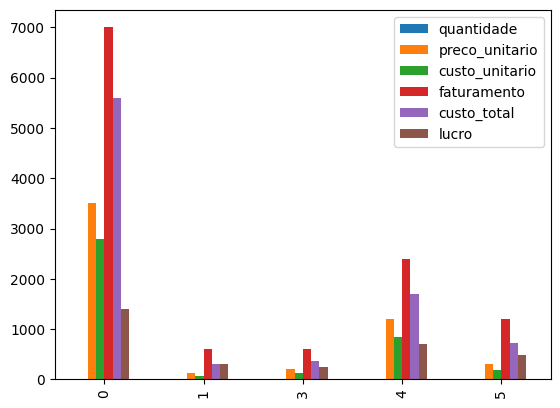

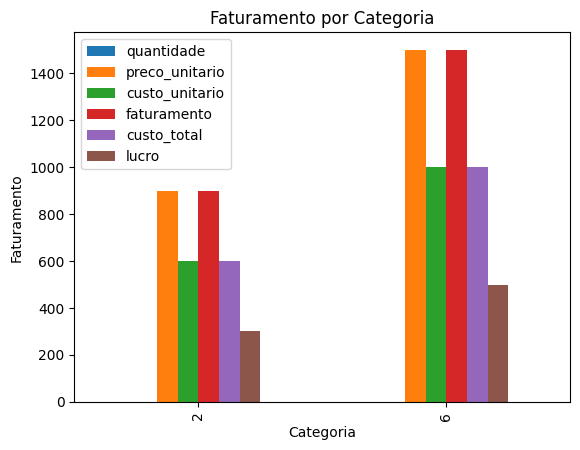

In [77]:
import matplotlib.pyplot as plt
faturamento_categoria = df.groupby("categoria")
faturamento_categoria.plot (kind="bar")
plt.title("Faturamento por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Faturamento")
plt.show()


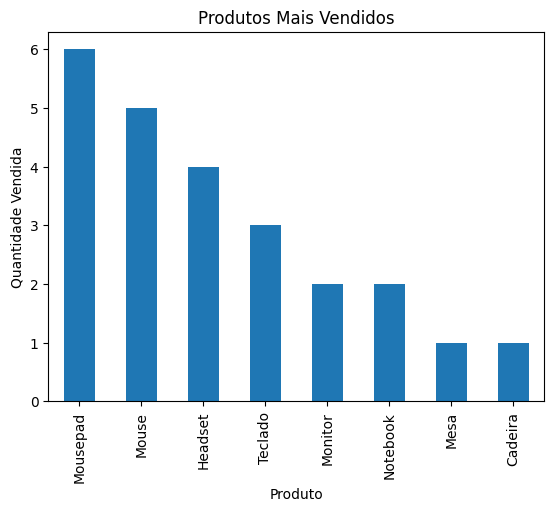

In [78]:
import matplotlib.pyplot as plt

produtos_mais_vendidos = (
    df.groupby("produto")["quantidade"]
    .sum()
    .sort_values(ascending=False)
)

produtos_mais_vendidos.plot(kind="bar")
plt.title("Produtos Mais Vendidos")
plt.xlabel("Produto")
plt.ylabel("Quantidade Vendida")
plt.show()


**Interpretação do gráfico**

O gráfico mostra que o **Mousepad** foi o produto com maior quantidade vendida
no período analisado, seguido por **Mouse** e **Headset**.
Já o **Monitor** apresentou o menor volume de vendas,
indicando menor demanda em relação aos demais produtos.


#### 4.4 Produtos com maior faturamento

Nesta análise foi considerado o faturamento total por produto,
calculado a partir da multiplicação da quantidade vendida pelo preço unitário.
O objetivo é identificar quais produtos geraram maior receita no período analisado.


In [79]:
df.groupby("produto")["quantidade"].sum().sort_values(ascending=False)

,quantidade
produto,
Mousepad,6
Mouse,5
Headset,4
Teclado,3
Monitor,2
Notebook,2
Mesa,1
Cadeira,1


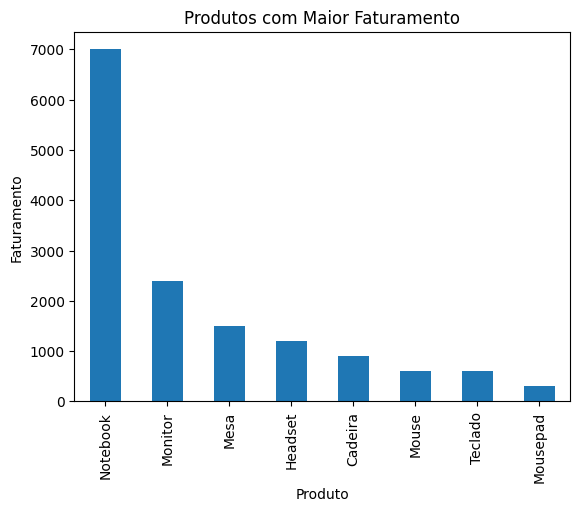

In [80]:
import matplotlib.pyplot as plt

faturamento_por_produto = (
    df.groupby("produto")["faturamento"]
    .sum()
    .sort_values(ascending=False)
)

faturamento_por_produto.plot(kind="bar")
plt.title("Produtos com Maior Faturamento")
plt.xlabel("Produto")
plt.ylabel("Faturamento")
plt.show()


**Interpretação da análise**

A análise do faturamento por produto mostra que o **Notebook** foi o item com maior faturamento
no período analisado, resultado principalmente do seu elevado preço unitário.

Em seguida, destacam-se o **Monitor** e a **Mesa**, que também apresentaram valores relevantes
de faturamento. Já produtos como **Mouse** e **Cadeira**, apesar de possuírem vendas,
tiveram menor impacto na receita total.


In [81]:
df.groupby("produto")["faturamento"].sum().sort_values(ascending=False)

,faturamento
produto,
Notebook,7000
Monitor,2400
Mesa,1500
Headset,1200
Cadeira,900
Mouse,600
Teclado,600
Mousepad,300


# Análise de Vendas

## 1. Importação dos dados
Descrição do dataset e das colunas.

## 2. Exploração inicial
Verificação de tipos, valores nulos e estrutura.

## 3. Criação de métricas
Cálculo de faturamento.

## 4. Análises
- Faturamento total  
- Faturamento por categoria  
- Produtos mais vendidos  
- Produtos com maior faturamento  

## 5. Visualizações
Gráficos para apoiar as análises.

## 6. Conclusões
Principais insights encontrados.


**Conclusão**

A análise de vendas realizada permitiu compreender o desempenho financeiro dos produtos e categorias ao longo do período analisado.

Os resultados demonstraram que a categoria Eletrônicos apresentou o maior faturamento e lucro, com destaque para o Notebook, que foi o produto mais lucrativo. Em contrapartida, produtos como Mousepad, Teclado e Cadeira tiveram menor impacto no lucro total.

A partir dessas informações, é possível apoiar decisões estratégicas, como priorização de estoque, foco em produtos de maior valor agregado e avaliação de estratégias para aumentar a rentabilidade dos itens com menor desempenho.

Dessa forma, a análise de dados se mostra uma ferramenta essencial para a tomada de decisão baseada em informações concretas.